# 과제 3: 시뮬레이션 결과를 애니메이션으로 시각화하기

보통 시뮬레이션 결과를 정적인 그래프로 시각화 하게 되는데, 시간에 따라 변화하는 상황에서는 애니메이션으로 보는 것이 가장 분석하기 좋습니다. 그래서 이번 과제에서는 시뮬레이션 결과를 애니메이션으로 시각화하는 방법을 배워볼게요.

<video width="640" height="480" controls>
  <source src="https://matplotlib.org/stable/_images/sphx_glr_double_pendulum_001.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
<p><strong>Figure 1.</strong> 예시: 이중 진자의 시간에 따른 움직임과 궤적</p>

먼저 정적인 그래프를 그리는 방법부터 복습해봅시다. 능숙하신 분은 넘어가셔도 좋아요.

## 1. 정적인 그래프 그리기

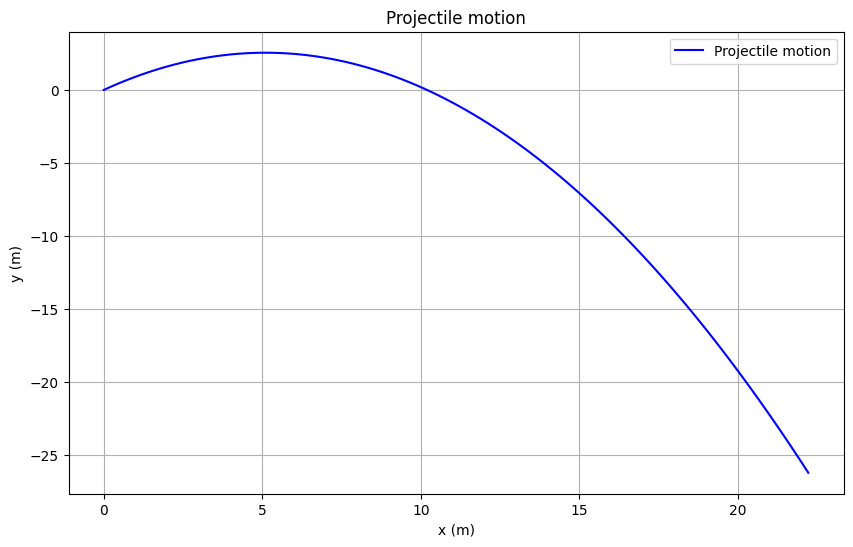

In [ ]:
import matplotlib.pyplot as plt # 그래프를 그리기 위한 라이브러리
import numpy as np # 수학적 계산을 위한 라이브러리

# x와 y 데이터 생성
v0 = 10 # 초기 속도
g = 9.81 # 중력 가속도
theta = np.pi / 4 # 발사 각도 (45도)

t = np.linspace(0, np.pi, 100) # 0부터 2π까지 100개의 점 생성
# 포물선 운동 공식
x = v0 * np.cos(theta) * t # x 좌표
y = v0 * np.sin(theta) * t - 1/2 * g * t**2 # y 좌표

# 그래프 그리기
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
plt.plot(x, y, label='Projectile motion', color='blue') # x에 대한 y의 그래프 그리기
plt.title('Projectile motion') # 그래프 제목
plt.xlabel('x (m)') # x축 이름
plt.ylabel('y (m)') # y축 이름
plt.grid(True) # 그리드 표시
plt.legend() # 범례 표시
plt.show() # 그래프 출력

## 좀 더 복잡한 그래프 그리기

아주 간단히 그래프 하나만 그릴 때는 위의 방법이면 충분합니다. 하지만 한 페이지에 여러 개의 그래프를 그리거나 3d 그래프를 그릴 때는 plt.subplots() 함수로 그래프를 그려야 합니다. 기본 개념은 다음 그림과 같습니다.

<div style="text-align: center">
  <img src="img/subplot.png" width="400">
  <p><strong>Figure 1.</strong> 노란 선: 공기 저항을 무시했을 때 궤적. 파란 선: 공기 저항을 고려했을 때 궤적</p>
</div>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# x와 y 데이터 생성
x = np.linspace(0, 2 * np.pi, 100)
y = np.exp(-x) * np.sin(2 * np.pi * x)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6)) # 서브플롯 생성

복습은 이정도로 하고, 바로 애니메이션 코드로 들어가봅시다. 애니메이션은 정적인 그래프를 그릴 줄 알면 쉽게 만들 수 있습니다. 그 방식 자체가 정적인 그래프를 여러 번 그려서 이어붙이는 것이기 때문입니다.

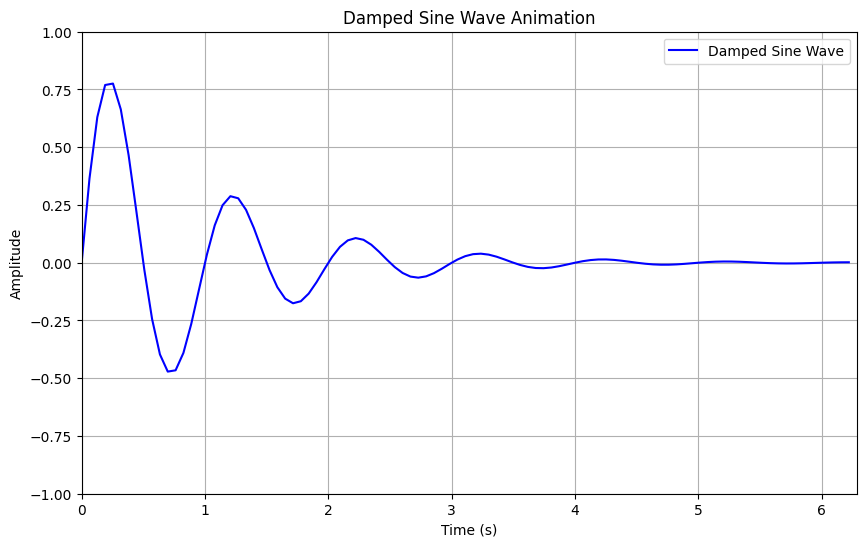

In [ ]:
import matplotlib.pyplot as plt # 그래프를 그리기 위한 라이브러리
from matplotlib.animation import FuncAnimation # 애니메이션 기능을 위한 라이브러리
from IPython.display import HTML # Jupyter Notebook에서 애니메이션을 표시하기 위한 라이브러리
import numpy as np # 수학적 계산을 위한 라이브러리

# x와 y 데이터 생성
v0 = 10 # 초기 속도
g = 9.81 # 중력 가속도
theta = np.pi / 4 # 발사 각도 (45도)

t = np.linspace(0, np.pi, 100) # 0부터 2π까지 100개의 점 생성
# 포물선 운동 공식
x = v0 * np.cos(theta) * t # x 좌표
y = v0 * np.sin(theta) * t - 1/2 * g * t**2 # y 좌표

# 그래프 초기 설정
# plt.subplots() 함수로 그래프 틀 fig와 그래프를 그릴 일종의 캔버스 ax를 생성한다.
fig, ax = plt.subplots(figsize=(10, 6)) # 그래프 크기는 10x6인치로 설정
line, = ax.plot([], [], label='Damped Sine Wave', color='blue') # 일단 빈 그래프를 생성하고, 나중에 데이터를 채워준다.
plt.figure(figsize=(10, 6)) # 그래프 크기 설정


fig = plt.figure(figsize=(10, 6)) # 
plt.plot(x, y, label='Projectile motion', color='blue') # x에 대한 y의 그래프 그리기
plt.title('Projectile motion') # 그래프 제목
plt.xlabel('x (m)') # x축 이름
plt.ylabel('y (m)') # y축 이름
plt.grid(True) # 그리드 표시
plt.legend() # 범례 표시
plt.show() # 그래프 출력

# 애니메이션 업데이트 함수
def update(frame):
    line.set_data(x[:frame], y[:frame])
    return line,

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(x), blit=True, interval=50)
# plt.show() # 애니메이션 출력
HTML(ani.to_jshtml())  # 또는 ani.to_html5_video()
